# Cards and Python

## The basics

In [1]:
import random

First we make a list of cards. This is for a single suit, we could do a full deck if we wanted

In [2]:
cards = ['A','2','3','4','5','6','7','8','9','10','J','Q','K']

Then use `randint` to generate indicies for our list instead of the actual cards

In [3]:
cards[random.randint(0,len(cards)-1)] #This line effectively draws a card at random (with replacement)

'7'

we used `len(cards)` so it is more flexible if we add more cards.
The -1 is to correct for mismatch between length and our indicies `len(0,...,12) = 13`

## Testing the Randomness

Here we test the random card selector 10 times

In [4]:
for el in range(0,10):
    print(cards[random.randint(0,len(cards)-1)])

8
5
6
8
K
K
2
3
9
9


Then since 10 seemed too few, we can do 1 million mock draws

In [5]:
trials=[]
for el in range(0,1000000):
    trials.append(cards[random.randint(0,len(cards)-1)])

In [6]:
import pandas as pd #Importing pandas for some analytics and graphing

We can convert the list of 1 million trials to a pandas series so that we can use values counts. This counts each time the value (card) appears in our series (list of trials)

In [7]:
vc=pd.Series(trials).value_counts()
vc

7     77289
6     77260
A     77240
4     77187
J     76975
9     76971
5     76919
3     76889
8     76791
2     76685
10    76673
Q     76590
K     76531
dtype: int64

We can then plot the values from our value counts. If our cards are in fact "random", we should get essentially equal bars

<AxesSubplot:>

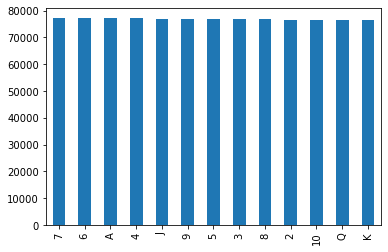

In [8]:
vc.plot(kind='bar')

Notice that if we were to run this code again, we'd get a different order and values due to the randomness.

## Math with cards

If we want to do math with the cards, we can build a dictionary that maps the card name to the card value.
This is safer and more flexible than using the card names themselves.
E.g. An Ace might have different values in different games.

In [9]:
cd = {'A':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9,'10':10,'J':11,'Q':12,'K':13}

In [10]:
cd[cards[random.randint(0,len(cards)-1)]]

12

Using the dictionary, we can draw multiple cards and then do math with them.

In [11]:
c1 = cards[random.randint(0,len(cards)-1)] # These are card names as strings
c2 = cards[random.randint(0,len(cards)-1)]

result = cd[c1]+cd[c2]  # We can then use the names as keys in our dictionary to get values

print("{} + {} = {}".format(c1,c2,result))

9 + 7 = 16


## Building a Deck

Here we can build out a deck much the same way we built the initial list of cards. This uses nested loops to do all suits and all cards

In [12]:
suits = ["_H","_C", "_D", "_S"] # I like the underscore here for readability and for a cool trick later
deck = [] # Initial empty deck
for el in suits: # Loop over suits
    for card in cards: # Loop over cards
        deck.append(card + el) #Add the cards into our deck
deck

['A_H',
 '2_H',
 '3_H',
 '4_H',
 '5_H',
 '6_H',
 '7_H',
 '8_H',
 '9_H',
 '10_H',
 'J_H',
 'Q_H',
 'K_H',
 'A_C',
 '2_C',
 '3_C',
 '4_C',
 '5_C',
 '6_C',
 '7_C',
 '8_C',
 '9_C',
 '10_C',
 'J_C',
 'Q_C',
 'K_C',
 'A_D',
 '2_D',
 '3_D',
 '4_D',
 '5_D',
 '6_D',
 '7_D',
 '8_D',
 '9_D',
 '10_D',
 'J_D',
 'Q_D',
 'K_D',
 'A_S',
 '2_S',
 '3_S',
 '4_S',
 '5_S',
 '6_S',
 '7_S',
 '8_S',
 '9_S',
 '10_S',
 'J_S',
 'Q_S',
 'K_S']

## Drawing through a deck

Here we write a function to keep us from having to write the same code over and over when we want to draw a card

In [13]:
def draw_card(cards): #Takes in a list of cards
    return cards[random.randint(0,len(cards)-1)] # Returns a card at random from our list 

We can test our function

In [14]:
draw_card(deck)

'J_S'

Here we loop over the deck and remove the cards we draw, if we did this correctly, every card will get drawn in random order.
Keep in mind, this is effectively shuffling the deck after each draw.
This shouldn't change anything as we have no knowledge of the order of the deck after we draw but is worth mentioning.

In [15]:
test_deck = deck.copy()
# We can force python to make a copy of our data
#This is only needed if we don't want to change the original deck


for el in range(0,len(deck)): #we want to use the length of the original deck here since our test_deck will get smaller as we draw cards. A while loop could be better here.
    draw = draw_card(test_deck)
    print("We draw {} from {} remaining cards".format(draw,len(test_deck)))
    test_deck.remove(draw)

We draw J_H from 52 remaining cards
We draw 5_C from 51 remaining cards
We draw 8_S from 50 remaining cards
We draw Q_C from 49 remaining cards
We draw 7_C from 48 remaining cards
We draw 4_S from 47 remaining cards
We draw 8_D from 46 remaining cards
We draw 6_C from 45 remaining cards
We draw 4_D from 44 remaining cards
We draw 9_S from 43 remaining cards
We draw J_S from 42 remaining cards
We draw 3_C from 41 remaining cards
We draw 9_H from 40 remaining cards
We draw 3_S from 39 remaining cards
We draw 7_S from 38 remaining cards
We draw 3_H from 37 remaining cards
We draw 10_S from 36 remaining cards
We draw 6_D from 35 remaining cards
We draw K_D from 34 remaining cards
We draw 5_H from 33 remaining cards
We draw 4_C from 32 remaining cards
We draw 5_S from 31 remaining cards
We draw Q_D from 30 remaining cards
We draw 9_D from 29 remaining cards
We draw A_H from 28 remaining cards
We draw J_D from 27 remaining cards
We draw A_C from 26 remaining cards
We draw Q_S from 25 remaini

In [16]:
test_deck = deck.copy()

while len(test_deck) > 0: # Same as above but with while instead
    draw = draw_card(test_deck)
    print("We draw {} from {} remaining cards".format(draw,len(test_deck)))
    test_deck.remove(draw)

We draw 3_S from 52 remaining cards
We draw Q_S from 51 remaining cards
We draw 8_C from 50 remaining cards
We draw A_C from 49 remaining cards
We draw 4_D from 48 remaining cards
We draw 2_H from 47 remaining cards
We draw 4_H from 46 remaining cards
We draw 2_D from 45 remaining cards
We draw 6_S from 44 remaining cards
We draw A_H from 43 remaining cards
We draw 2_S from 42 remaining cards
We draw 8_H from 41 remaining cards
We draw Q_C from 40 remaining cards
We draw 9_D from 39 remaining cards
We draw 5_D from 38 remaining cards
We draw 10_C from 37 remaining cards
We draw 7_D from 36 remaining cards
We draw 6_H from 35 remaining cards
We draw K_C from 34 remaining cards
We draw Q_D from 33 remaining cards
We draw 7_H from 32 remaining cards
We draw 2_C from 31 remaining cards
We draw A_S from 30 remaining cards
We draw 8_D from 29 remaining cards
We draw 5_C from 28 remaining cards
We draw 5_H from 27 remaining cards
We draw 10_H from 26 remaining cards
We draw 9_H from 25 remain

## Doing Math with a Full Deck

The last thing we can do is do math with our entire deck. Since we used the underscore in our card names and the dictionary to assign our card values, we can combine those to not have to add anything to our dictionary to get value for any card in the deck.

In [17]:
test_deck2 = deck.copy()

draw1 = draw_card(test_deck2)
draw2 = draw_card(test_deck2)

total = cd[draw1.split('_')[0]] + cd[draw2.split('_')[0]]
# Here we are splitting our card names ('A_S') into name ('A') and suit ('S').
#Then we can take the 0th element, the name ('A'), as the key to our dictionary to get the value (1)

print("{} + {} = {}".format(draw1, draw2, total))

J_S + 6_S = 17


If we want to draw a card and then draw from the deck again (without replacement), we just need to remove the card we draw from the deck.

In [18]:
test_deck2 = deck.copy()

draw1 = draw_card(test_deck2)

test_deck2.remove(draw1)

draw2 = draw_card(test_deck2)

result = cd[draw1.split('_')[0]] + cd[draw2.split('_')[0]]

print("{} + {} = {}".format(draw1, draw2, result))

J_D + 2_S = 13
